In [ ]:
import pandas as pd

In [ ]:
house_info_url = 'https://raw.githubusercontent.com/Manju410/MLPractice/main/Real_estate.csv'

In [ ]:
df = pd.read_csv(house_info_url)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.drop('No', axis=1, inplace=True)

In [ ]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1:]

In [ ]:
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [ ]:
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [ ]:
X.shape

(414, 5)

In [ ]:
X_train = X.iloc[:350, :]
y_train = y.iloc[:350, :]

X_test = X.iloc[350:, :]
y_test = y.iloc[350:, :]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mdl = LinearRegression()
mdl.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
c = mdl.intercept_
c

array([-5491.46109274])

In [ ]:
m = mdl.coef_
m

array([[-2.78758171e-01, -3.98964697e-03,  1.15190896e+00,
         2.69185622e+02, -9.76930419e+00]])

In [ ]:
coeff_df = pd.DataFrame({'Col' : X_train.columns,
                         'Coeff' : mdl.coef_.flatten()})

coeff_df

,Col,Coeff
0,X2 house age,-0.278758
1,X3 distance to the nearest MRT station,-0.003990
2,X4 number of convenience stores,1.151909
3,X5 latitude,269.185622
4,X6 longitude,-9.769304


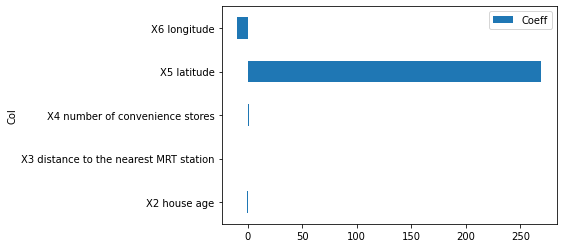

In [ ]:
coeff_df.set_index('Col').plot.barh()

In [ ]:
test_val = X_test.iloc[0, :]
test_val.shape

(5,)

In [ ]:
import numpy as np

In [ ]:
test_pred = c + np.dot(m, test_val)

test_pred

array([41.57891599])

In [ ]:
y_test.iloc[0]

Y house price of unit area    42.3
Name: 350, dtype: float64

In [ ]:
X_train.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


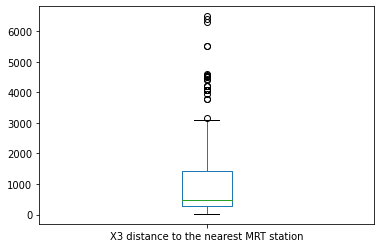

In [ ]:
X_train.iloc[:, 1].plot.box()

In [ ]:
X_train2 = X_train.copy()

## Let's change distance from meters to kilometers

In [ ]:
X_train2[X_train2.columns[1]] = X_train2[X_train2.columns[1]] / 1000
X_train2.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,0.084879,10,24.98298,121.54024
1,19.5,0.306595,9,24.98034,121.53951
2,13.3,0.561984,5,24.98746,121.54391
3,13.3,0.561984,5,24.98746,121.54391
4,5.0,0.390568,5,24.97937,121.54245


In [ ]:
X_test2 = X_test.copy()

X_test2[X_test2.columns[1]] = X_test2[X_test2.columns[1]] / 1000
X_test2.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
350,13.2,0.492231,5,24.96515,121.53737
351,4.0,2.180245,3,24.96324,121.51241
352,18.4,2.674961,3,24.96143,121.50827
353,4.1,2.147376,3,24.96299,121.51284
354,12.2,1.360139,1,24.95204,121.54842


In [ ]:
mdl2 = LinearRegression()
mdl2.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
c2 = mdl2.intercept_
c2

array([-5491.46109274])

In [ ]:
m2 = mdl2.coef_
m2

array([[ -0.27875817,  -3.98964697,   1.15190896, 269.18562233,
         -9.76930419]])

In [ ]:
coeff_df2 = pd.DataFrame({'Col' : X_train2.columns,
                          'Ceoff': m2.flatten()})

coeff_df2

,Col,Ceoff
0,X2 house age,-0.278758
1,X3 distance to the nearest MRT station,-3.989647
2,X4 number of convenience stores,1.151909
3,X5 latitude,269.185622
4,X6 longitude,-9.769304


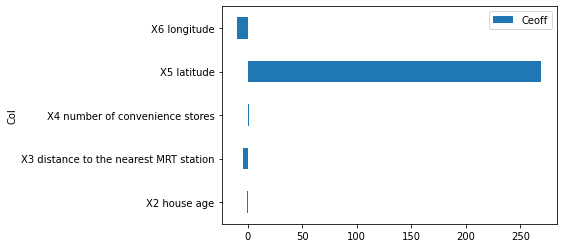

In [ ]:
coeff_df2.set_index('Col').plot.barh()

In [ ]:
coeff_df.columns

Index(['Col', 'Coeff'], dtype='object')

In [ ]:
coeff_df2.columns

Index(['Col', 'Ceoff'], dtype='object')

In [ ]:
pd.merge(coeff_df,
         coeff_df2,
         on='Col',
         suffixes=('_1', '_2'))

,Col,Coeff,Ceoff
0,X2 house age,-0.278758,-0.278758
1,X3 distance to the nearest MRT station,-0.003990,-3.989647
2,X4 number of convenience stores,1.151909,1.151909
3,X5 latitude,269.185622,269.185622
4,X6 longitude,-9.769304,-9.769304


The scale or "unit of measurement" of a feature affects the co-efficient

In [ ]:
X_train.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


Change years to hours

In [ ]:
X_train3 = X_train2.copy()

X_train3[X_train3.columns[0]] = X_train3[X_train3.columns[0]] * 365 * 24
X_train3.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,280320.0,0.084879,10,24.98298,121.54024
1,170820.0,0.306595,9,24.98034,121.53951
2,116508.0,0.561984,5,24.98746,121.54391
3,116508.0,0.561984,5,24.98746,121.54391
4,43800.0,0.390568,5,24.97937,121.54245


In [ ]:
X_test3 = X_test2.copy()

X_test3[X_test3.columns[0]] = X_test3[X_test3.columns[0]] * 365 * 24
X_test3.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
350,115632.0,0.492231,5,24.96515,121.53737
351,35040.0,2.180245,3,24.96324,121.51241
352,161184.0,2.674961,3,24.96143,121.50827
353,35916.0,2.147376,3,24.96299,121.51284
354,106872.0,1.360139,1,24.95204,121.54842


In [ ]:
mdl3 = LinearRegression()
mdl3.fit(X_train3, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
c3 = mdl3.intercept_
c3, c

(array([-5491.46109274]), array([-5491.46109274]))

In [ ]:
m3 = mdl3.coef_
m3

array([[-3.18217090e-05, -3.98964697e+00,  1.15190896e+00,
         2.69185622e+02, -9.76930419e+00]])

In [ ]:
coeff_df3 = pd.DataFrame({'Col' : X_train3.columns,
                          'Ceoff': m3.flatten()})

coeff_df3

,Col,Ceoff
0,X2 house age,-0.000032
1,X3 distance to the nearest MRT station,-3.989647
2,X4 number of convenience stores,1.151909
3,X5 latitude,269.185622
4,X6 longitude,-9.769304


In [ ]:
pd.merge(coeff_df,
         coeff_df2,
         on='Col',
         suffixes=('_1', '_2')).merge(coeff_df3, on='Col')

,Col,Coeff,Ceoff_x,Ceoff_y
0,X2 house age,-0.278758,-0.278758,-0.000032
1,X3 distance to the nearest MRT station,-0.003990,-3.989647,-3.989647
2,X4 number of convenience stores,1.151909,1.151909,1.151909
3,X5 latitude,269.185622,269.185622,269.185622
4,X6 longitude,-9.769304,-9.769304,-9.769304


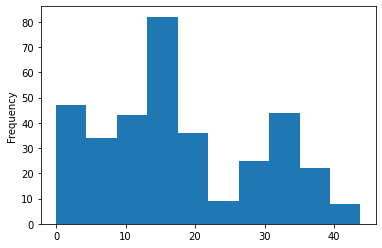

In [ ]:
X_train.iloc[:, 0].plot.hist()

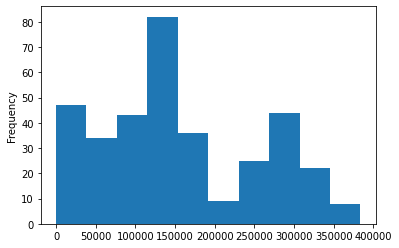

In [ ]:
X_train3.iloc[:, 0].plot.hist()

In [ ]:
X_train.describe().loc[['min', 'max'], X_train.columns[0]]

min     0.0
max    43.8
Name: X2 house age, dtype: float64

In [ ]:
X_train3.describe().loc[['min', 'max'], X_train.columns[0]]

min         0.0
max    383688.0
Name: X2 house age, dtype: float64

In [ ]:
X_train.describe().loc[['min', 'max'], X_train.columns[1]]

min      23.38284
max    6488.02100
Name: X3 distance to the nearest MRT station, dtype: float64

In [ ]:
X_train3.describe().loc[['min', 'max'], X_train.columns[1]]

min    0.023383
max    6.488021
Name: X3 distance to the nearest MRT station, dtype: float64

So let's bring all the features under the same "range of values"

In [ ]:
runs = np.array([ 10, 10, 45, 80, 10, 45, 120, 45, 45, 80, 80, 180 ])
runs

array([ 10,  10,  45,  80,  10,  45, 120,  45,  45,  80,  80, 180])

In [ ]:
min(runs), max(runs)

(10, 180)

In [ ]:
runs - min(runs)

array([  0,   0,  35,  70,   0,  35, 110,  35,  35,  70,  70, 170])

In [ ]:
scaled_runs = (runs - min(runs))/ (max(runs) - min(runs))
scaled_runs

array([0.        , 0.        , 0.20588235, 0.41176471, 0.        ,
       0.20588235, 0.64705882, 0.20588235, 0.20588235, 0.41176471,
       0.41176471, 1.        ])

In [ ]:
import matplotlib.pyplot as plt


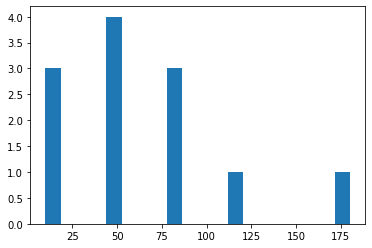

In [ ]:
plt.hist(runs, bins=20);

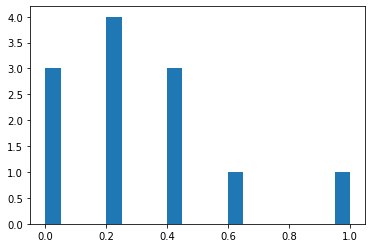

In [ ]:
plt.hist(scaled_runs, bins=20);

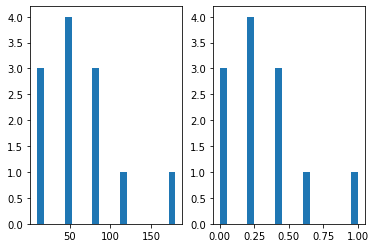

In [ ]:
ax1 = plt.subplot(121) # 1 - row, 2 - columns, 1 - plot id
ax1.hist(runs, bins=20);

ax2 = plt.subplot(122) # 2 - plot id
ax2.hist(scaled_runs, bins=20);

In [ ]:
X_train4 = X_train.copy()


In [ ]:
X_train4.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [ ]:
for col in X_train4.columns:
  col_min = X_train4[col].min()
  col_max = X_train4[col].max()
  X_train4[col] = (X_train4[col] - col_min)/ (col_max - col_min)

In [ ]:
X_train4.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.730594,0.009513,1.0,0.612907,0.719323
1,0.445205,0.043809,0.9,0.580578,0.711451
2,0.303653,0.083315,0.5,0.667769,0.758896
3,0.303653,0.083315,0.5,0.667769,0.758896
4,0.114155,0.056799,0.5,0.568699,0.743153


In [ ]:
X_train.describe().loc[ ['min', 'max'], :].T

,min,max
X2 house age,0.00000,43.80000
X3 distance to the nearest MRT station,23.38284,6488.02100
X4 number of convenience stores,0.00000,10.00000
X5 latitude,24.93293,25.01459
X6 longitude,121.47353,121.56627


In [ ]:
X_train4.describe().loc[ ['min', 'max'], :].T

,min,max
X2 house age,0.0,1.0
X3 distance to the nearest MRT station,0.0,1.0
X4 number of convenience stores,0.0,1.0
X5 latitude,0.0,1.0
X6 longitude,0.0,1.0


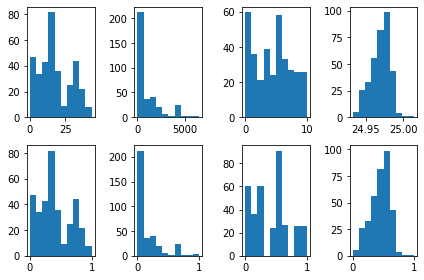

In [ ]:
plotids1 = range(241, 245)
plotids2 = range(245, 250)
for col, pid1, pid2 in zip(X_train.columns, plotids1, plotids2):
  ax1 = plt.subplot(pid1)
  ax1.hist(X_train[col])

  ax2 = plt.subplot(pid2)
  ax2.hist(X_train4[col])

plt.tight_layout()

Only for the categorical feature, we see that the distribution is affected

Thus, we **should not scale** a categorical feature

In [ ]:
X_train.columns[2] # This is categorical

'X4 number of convenience stores'

In [ ]:
X_train[X_train.columns[2]].value_counts()

0     60
5     58
3     39
1     36
6     33
7     27
8     26
4     24
2     21
9     19
10     7
Name: X4 number of convenience stores, dtype: int64

In [ ]:
mdl4 = LinearRegression()

mdl4.fit(X_train4, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
c4 = mdl4.intercept_
c4

array([33.3200305])

In [ ]:
m4 = mdl4.coef_
m4

array([[-12.20960789, -25.79162407,  11.51908964,  21.98169792,
         -0.90600527]])

In [ ]:
coeff_df4 = pd.DataFrame({'Col' : X_train4.columns,
                          'Ceoff': m4.flatten()})

coeff_df4

,Col,Ceoff
0,X2 house age,-12.209608
1,X3 distance to the nearest MRT station,-25.791624
2,X4 number of convenience stores,11.519090
3,X5 latitude,21.981698
4,X6 longitude,-0.906005


These are the co-effecients that can be compared with eachother

In [ ]:
pd.merge(coeff_df,
         coeff_df2,
         on='Col',
         suffixes=('_1', '_2')).merge(coeff_df3, on='Col').merge(coeff_df4, on='Col')

,Col,Coeff,Ceoff_x,Ceoff_y,Ceoff
0,X2 house age,-0.278758,-0.278758,-0.000032,-12.209608
1,X3 distance to the nearest MRT station,-0.003990,-3.989647,-3.989647,-25.791624
2,X4 number of convenience stores,1.151909,1.151909,1.151909,11.519090
3,X5 latitude,269.185622,269.185622,269.185622,21.981698
4,X6 longitude,-9.769304,-9.769304,-9.769304,-0.906005


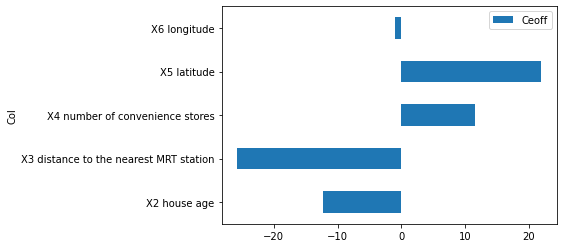

In [ ]:
coeff_df4.set_index('Col').plot.barh()

In [ ]:
test_val

X2 house age                               13.20000
X3 distance to the nearest MRT station    492.23130
X4 number of convenience stores             5.00000
X5 latitude                                24.96515
X6 longitude                              121.53737
Name: 350, dtype: float64

In [ ]:
c4 + np.dot(m4, test_val)

array([-12327.03310432])

In [ ]:
min_max_cols = X_train.describe().loc[ ['min', 'max'], :].T
min_max_cols

,min,max
X2 house age,0.00000,43.80000
X3 distance to the nearest MRT station,23.38284,6488.02100
X4 number of convenience stores,0.00000,10.00000
X5 latitude,24.93293,25.01459
X6 longitude,121.47353,121.56627


In [ ]:
scale_min = min_max_cols['min']
scale_min

X2 house age                                0.00000
X3 distance to the nearest MRT station     23.38284
X4 number of convenience stores             0.00000
X5 latitude                                24.93293
X6 longitude                              121.47353
Name: min, dtype: float64

In [ ]:
scale_range = min_max_cols['max'] - min_max_cols['min']
scale_range

X2 house age                                43.80000
X3 distance to the nearest MRT station    6464.63816
X4 number of convenience stores             10.00000
X5 latitude                                  0.08166
X6 longitude                                 0.09274
dtype: float64

In [ ]:
test_val_scaled = (test_val - scale_min) / scale_range
test_val_scaled

X2 house age                              0.301370
X3 distance to the nearest MRT station    0.072525
X4 number of convenience stores           0.500000
X5 latitude                               0.394563
X6 longitude                              0.688376
dtype: float64

In [ ]:
c4 + np.dot(m4, test_val_scaled)

array([41.57891599])

In [ ]:
c + np.dot(m, test_val)

array([41.57891599])

In [ ]:
X_train3.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,280320.0,0.084879,10,24.98298,121.54024
1,170820.0,0.306595,9,24.98034,121.53951
2,116508.0,0.561984,5,24.98746,121.54391
3,116508.0,0.561984,5,24.98746,121.54391
4,43800.0,0.390568,5,24.97937,121.54245


In [ ]:
X_train4.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.730594,0.009513,1.0,0.612907,0.719323
1,0.445205,0.043809,0.9,0.580578,0.711451
2,0.303653,0.083315,0.5,0.667769,0.758896
3,0.303653,0.083315,0.5,0.667769,0.758896
4,0.114155,0.056799,0.5,0.568699,0.743153


In [ ]:
y_learnt4 = mdl4.predict(X_train4)
y_learnt4[:5]

array([[48.49454152],
       [49.23902316],
       [47.21438951],
       [47.21438951],
       [48.04852356]])

In [ ]:
y_train[:5]

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [ ]:
learntdf = pd.DataFrame({'Actual':y_train.iloc[:,0],'Learnt':y_learnt4.flatten()})
learntdf.head()

,Actual,Learnt
0,37.9,48.494542
1,42.2,49.239023
2,47.3,47.214390
3,54.8,47.214390
4,43.1,48.048524


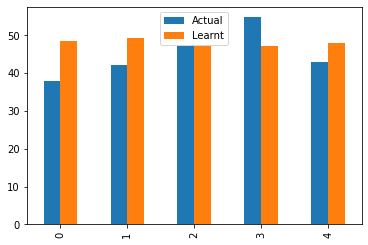

In [ ]:
learntdf.head().plot(kind='bar')

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
ylearn_mse = mse(y_train,y_learnt4)
ylearn_mse

81.75629086728158

In [ ]:
import numpy as np

In [ ]:
ylearn_rmse = np.sqrt(ylearn_mse)
ylearn_rmse

9.041918539075741

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2score_learn = r2_score(y_train,y_learnt4)
r2score_learn

0.5678559054812132

In [ ]:
X_test4 = X_test.copy()

In [ ]:
for col in X_train.columns:
  col_min = X_train[col].min()
  col_max = X_train[col].max()
  X_test4[col] = (X_test4[col] - col_min)/ (col_max - col_min)

In [ ]:
X_train.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [ ]:
X_test4[:5]

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
350,0.301370,0.072525,0.5,0.394563,0.688376
351,0.091324,0.333640,0.3,0.371173,0.419237
352,0.420091,0.410167,0.3,0.349008,0.374596
353,0.093607,0.328556,0.3,0.368112,0.423873
354,0.278539,0.206780,0.1,0.234019,0.807526


In [ ]:
y_pred = mdl4.predict(X_test4)
y_pred[:5]

array([[41.57891599],
       [34.83479178],
       [28.40015087],
       [34.86655446],
       [30.15041866]])

In [ ]:
ypred_df = pd.DataFrame({'Actual': y_test.iloc[:,0],'pred': y_pred.flatten()})
ypred_df.head()

,Actual,pred
350,42.3,41.578916
351,28.6,34.834792
352,25.7,28.400151
353,31.3,34.866554
354,30.1,30.150419


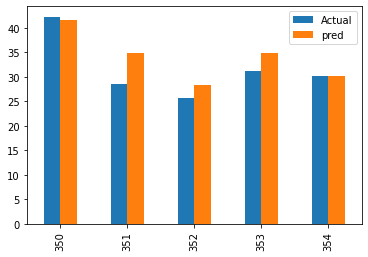

In [ ]:
ypred_df.head().plot(kind='bar')

In [ ]:
ypred_mse = mse(y_test,y_pred)
ypred_mse

66.06479597348576

In [ ]:
ypred_rmse = np.sqrt(ypred_mse)
ypred_rmse

8.128025342817637

In [ ]:
r2score_pred = r2_score(y_test,y_pred)
r2score_pred

0.586035599457349

In [ ]:
n= X_test4.shape[0]
k= X_test4.shape[1]
n,k

(64, 5)

In [ ]:
adj_r2 = 1-(((1-r2score_pred)*(n-1))/(n-k-1))
adj_r2

0.5503490132036721